# Process Data


In [2]:
from random import randrange
import pandas as pd
import tensorflow as tf

from sklearn.model_selection import train_test_split

data = pd.read_csv("data/semeion.csv")

number_columns = ["1.124", "0.132", "0.133", "0.134", "0.135", "0.136", "0.137", "0.138", "0.139", "0.140"]
number_names = ["is_0", "is_1", "is_2", "is_3", "is_4", "is_5", "is_6", "is_7", "is_8", "is_9"]

label_data = data[number_columns]
data = data.drop(axis=1, columns=number_columns)


# Change the label names to be more descriptive
for i in range(10):
    label_data = label_data.rename(columns={number_columns[i]: number_names[i]})

X_train, X_test, y_train, y_test = train_test_split(data, label_data, test_size = .20, random_state=3000)

In [3]:
def print_number(number_list):
    for i in range(16*16):
        
        if number_list[i] == 0:
            print("*", end="")
        else:
            print("#", end="")

        if i % 16 == 15:
            print("")
    print("")


# Build Model

In [4]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt 

# for n in range(1, 20, 1):
#     KNN_classifier = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
#     KNN_classifier.fit(X_train, y_train)
#     print(f"\nAccuracy of the Algorithm with {n}_neighbors: ", KNN_classifier.score(X_test, y_test))

KNN_classifier = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
KNN_classifier.fit(X_train, y_train)

print("Done")

Done


# Show results

In [5]:
def get_guess_number(prediction_row):
    for x in range(10):
        if prediction_row[x] == 1:
            return x

## Accuracy

In [6]:

print("\nAccuracy of the Algorithm: ", KNN_classifier.score(X_test, y_test))




Accuracy of the Algorithm:  0.8934169278996865


In [7]:
# Show the ones it misses
def display_missed_classifications():
    predicted = KNN_classifier.predict(X_test)
    actual = y_test

    missed_indexes = []

    for x in range(len(predicted)):
        if list(predicted[x]) == list(actual.iloc[x]):
            continue
        print_number(X_test.iloc[x])
        print(f"guessed {get_guess_number(predicted[x])} should be {get_guess_number(list(actual.iloc[x]))}") 
        missed_indexes.append(x)

display_missed_classifications()


*************##*
***********####*
**********#####*
*********######*
*******###**##**
******###**##***
****####***##***
***###****##****
*####*****##****
###*******##*##*
##***###########
############****
*********##*****
*********##*****
********###*****
*********#******

guessed 1 should be 4
*******######***
*****####**###**
***####*****###*
**###********###
*###**********##
*##*#####*#####*
##****########**
##*#####*****##*
**###*********##
*###**********##
###***********##
##***********###
##**********###*
##*******####***
###***#####*****
*########*******

guessed 0 should be 8
**########******
*###******###***
##*********##***
*#**********#***
####*******##***
#########*###***
*###*****####***
**############**
****######**##**
*************##*
*************###
**************##
**************##
***####******##*
****###########*
*********##*****

guessed None should be 9
*##############*
###**********###
**************##
*************##*
***********####*
*******######***
*****####*

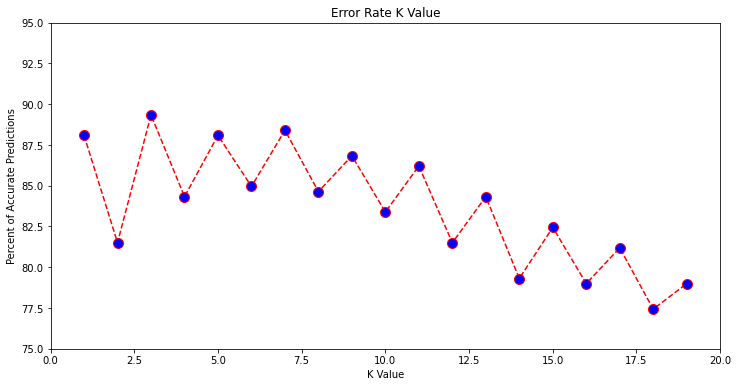

In [18]:
import matplotlib.pyplot as plt
def plot_k_error_rate():
    error = []
    for n in range(1, 20):
        KNN_classifier = KNeighborsClassifier(n_neighbors=n, metric='euclidean')
        KNN_classifier.fit(X_train, y_train)
        error.append(100 * KNN_classifier.score(X_test, y_test))
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 20), error, color='red', linestyle='dashed', marker='o',
            markerfacecolor='blue', markersize=10)
    plt.title('Error Rate K Value')
    plt.xlabel('K Value')
    plt.ylabel('Percent of Accurate Predictions')
    plt.xlim(0, 20)
    plt.ylim(75, 95)
plot_k_error_rate()